In [75]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [76]:

# URL File from github
path_retail_data = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Week 7-Dimentional reduction\PCA-LDA-and-tSNE-and-dimentional-reduction\retail_data_W23 - retail_data_W23.csv"
path_retail_orders = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Week 7-Dimentional reduction\PCA-LDA-and-tSNE-and-dimentional-reduction\retail_orders_W23 - retail_orders_W23.csv"
path_store = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Week 7-Dimentional reduction\PCA-LDA-and-tSNE-and-dimentional-reduction\store - store.csv"
#reading data
df_retail_data = pd.read_csv(path_retail_data)
df_retail_orders = pd.read_csv(path_retail_orders)
df_store = pd.read_csv(path_store)


In [77]:
df_retail_data


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,3,5,2015-07-31,821,1,1,0,1,409
1,4,5,2015-07-31,1498,1,1,0,1,427
2,5,5,2015-07-31,559,1,1,0,1,445
3,6,5,2015-07-31,589,1,1,0,1,463
4,10,5,2015-07-31,681,1,1,0,1,535
...,...,...,...,...,...,...,...,...,...
651008,1106,2,2013-01-01,0,0,0,a,1,18309955
651009,1109,2,2013-01-01,0,0,0,a,1,18310009
651010,1112,2,2013-01-01,0,0,0,a,1,18310063
651011,1113,2,2013-01-01,0,0,0,a,1,18310081


In [78]:
df_retail_orders


,Id,Orders
0,409,8314
1,427,13995
2,445,4822
3,463,5651
4,535,7185
...,...,...
651008,18309955,0
651009,18310009,0
651010,18310063,0
651011,18310081,0


In [79]:
df_store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [80]:
# CCount of nule values
nule_data_sum = df_retail_data.isnull().sum()
nule_orders_sum = df_retail_orders.isnull().sum()
nule_store_sum = df_store.isnull().sum()

print(nule_data_sum,nule_orders_sum,nule_store_sum)



Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64 Id        0
Orders    0
dtype: int64 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [81]:
# Count NAN values
empty_data_sum = df_retail_data.isna().sum()
empty_orders_sum = df_retail_orders.isna().sum()
empty_store = df_store.isna().sum()

print(empty_data_sum,empty_orders_sum,empty_store)



Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64 Id        0
Orders    0
dtype: int64 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [82]:
#merging dataframes
#merging retail data and retail orders
df_merged = pd.merge(df_retail_data, df_retail_orders, on='Id', how='inner')  # inner join
#merging the resulting dataframe with the remaining which for this case is store
df_merged = pd.merge(df_merged, df_store, on='Store', how='inner')  # inner join
df_merged


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Orders,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,3,5,2015-07-31,821,1,1,0,1,409,8314,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,3,4,2015-07-30,823,1,1,0,1,20479,8977,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,2,2015-07-28,818,1,1,0,1,60619,8864,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,7,2015-07-26,0,0,0,0,0,100759,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,3,6,2015-07-25,412,1,0,0,0,120829,3878,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651008,1,1,2013-01-07,785,1,1,0,1,18169663,7176,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
651009,1,7,2013-01-06,0,0,0,0,1,18189733,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
651010,1,6,2013-01-05,635,1,0,0,1,18209803,4997,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
651011,1,5,2013-01-04,619,1,0,0,1,18229873,4486,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [83]:
array_merged = df_merged.to_numpy()
array_merged

array([[3, 5, '2015-07-31', ..., 14.0, 2011.0, 'Jan,Apr,Jul,Oct'],
       [3, 4, '2015-07-30', ..., 14.0, 2011.0, 'Jan,Apr,Jul,Oct'],
       [3, 2, '2015-07-28', ..., 14.0, 2011.0, 'Jan,Apr,Jul,Oct'],
       ...,
       [1, 6, '2013-01-05', ..., nan, nan, nan],
       [1, 5, '2013-01-04', ..., nan, nan, nan],
       [1, 2, '2013-01-01', ..., nan, nan, nan]], dtype=object)

In [84]:
# Suponiendo que tienes un DataFrame llamado 'df' con una columna 'Fecha' y una columna 'Cantidad_Ordenes'
# Asegúrate de que la columna 'Fecha' sea de tipo datetime
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Establece la columna 'Fecha' como el índice del DataFrame
df_merged.set_index('Date', inplace=True)

# Calcula la cantidad de órdenes por día
cantidad_ordenes_por_dia = df_merged.resample('D').sum()

# Realiza la prueba de Dickey-Fuller Aumentada
resultado_adf = adfuller(cantidad_ordenes_por_dia['Orders'])

# Imprime los resultados
print('Estadística de la prueba:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
print('Valores críticos:', resultado_adf[4])


Estadística de la prueba: -4.830019091325034
Valor p: 4.7633057563525225e-05
Valores críticos: {'1%': -3.437470108019385, '5%': -2.8646832620852853, '10%': -2.5684436698650503}


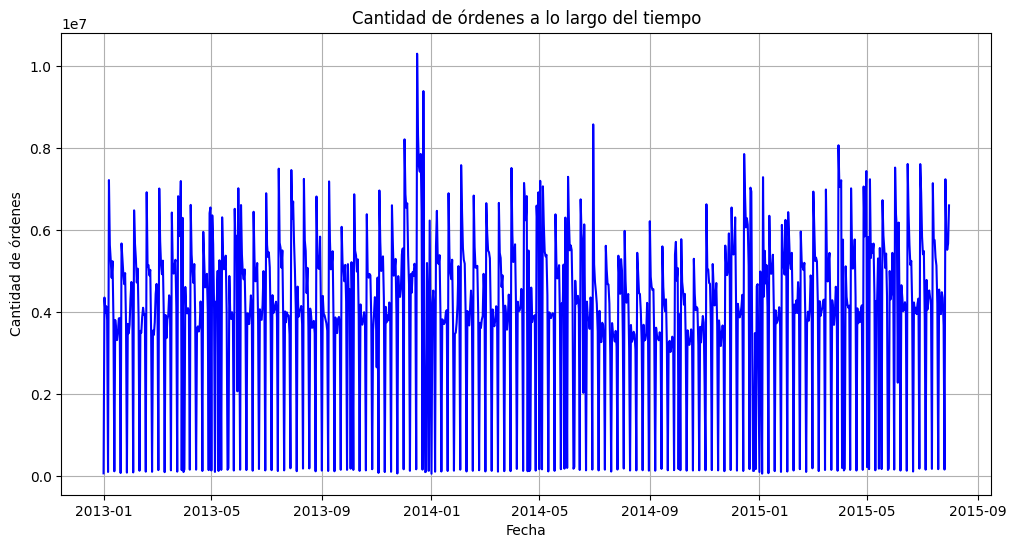

In [86]:

# Graficar la cantidad de órdenes por día
plt.figure(figsize=(12, 6))
plt.plot(cantidad_ordenes_por_dia.index, cantidad_ordenes_por_dia['Orders'], color='blue')
plt.title('Cantidad de órdenes a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de órdenes')
plt.grid(True)
plt.show()

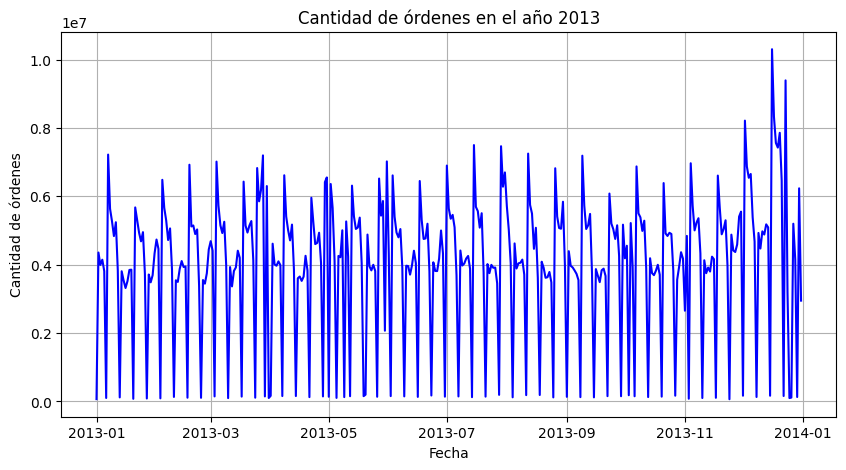

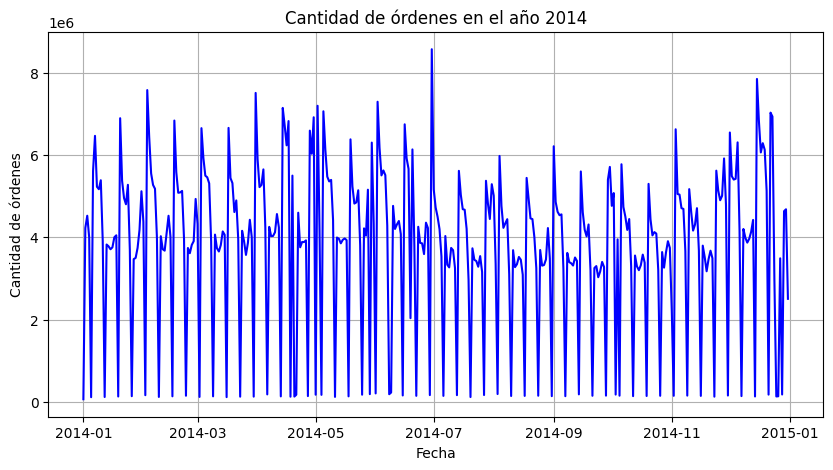

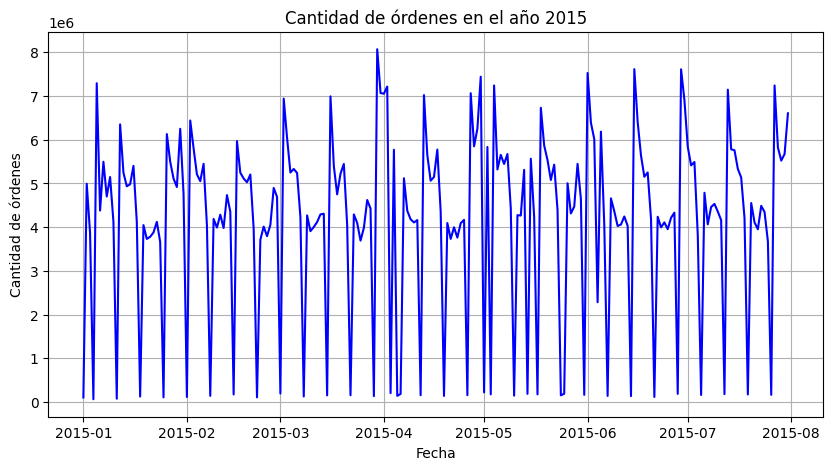

In [88]:
import matplotlib.pyplot as plt

# Agrupar los datos por año
cantidad_ordenes_por_anio = cantidad_ordenes_por_dia.resample('Y').sum()

# Generar un gráfico separado para cada año
for year in cantidad_ordenes_por_anio.index.year:
    data_year = cantidad_ordenes_por_dia[cantidad_ordenes_por_dia.index.year == year]
    plt.figure(figsize=(10, 5))
    plt.plot(data_year.index, data_year['Orders'], color='blue')
    plt.title(f'Cantidad de órdenes en el año {year}')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de órdenes')
    plt.grid(True)
    plt.show()
